# Titanic dataset modeling

The purpose of this notebook is analize, clean, prepare and model the titanic dataset. 
According to kaggle titanic competition: 
"The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck (...). In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)."

So, using this dataset, I will try to predict who survive.

Some inspirational links:
- https://www.kaggle.com/shivadumnawar/titanic-a-complete-tutorial-for-beginners
- https://www.kaggle.com/startupsci/titanic-data-science-solutions
- https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial
- https://www.kaggle.com/rawanreda/titanic-dataset-full-tutorial
- https://www.analyticsvidhya.com/blog/2021/05/titanic-survivors-a-guide-for-your-first-data-science-project/

## Imports

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelling Helpers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

"""
# Metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
"""

'\n# Metrics for evaluation\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import classification_report\nfrom sklearn.metrics import accuracy_score\n'

## Data

In [2]:
# get data and merge into a single dataframe
train = pd.read_csv(r'.\data\train.csv')
test = pd.read_csv(r'.\data\test.csv')

df_full = train.append(test, ignore_index = True)
print("Full titanic dataset: \n")
df_full.head()

Full titanic dataset: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# last rows
df_full.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## EDA

### Statistical summaries and data exploration

Variable Description

- Survived: Survived (1) or died (0)
- Pclass: Passenger's class
- Name: Passenger's name
- Sex: Passenger's sex
- Age: Passenger's age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Fare
- Cabin: Cabin
- Embarked: Port of embarkation

Categorical features: name, survived, sex, embarked

Ordinal: PClass

Continuous: Age, Fare

Discrete: SibSp, Parch

Mixed: Cabin, ticket

In [4]:
df_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


There are some variables with missing, null or empty values. They are: Age, Fare, Cabin and Embarked. This variables will need some kind of imputation method.

In [9]:
# categorical variables distribution
df_full.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


According to this information, I can see some insights:
1. There is a lot of missing values for cabin, and apparently, there were people who shared cabins. This makes sense, considering cabins prices and families on board.
2. There are more men than women (65% of population).
3. It seems that S port was the most used by passengers.
4. Name has poor information, considering its uniques values distribution.
5. Ticket feature has high ratio (29%) of duplicate values (unique=929).

### Analyze, identify patterns, and visualize data

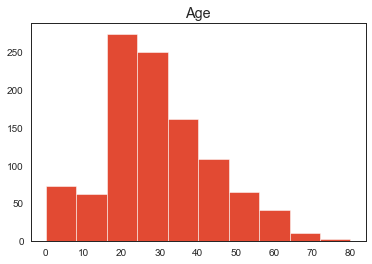

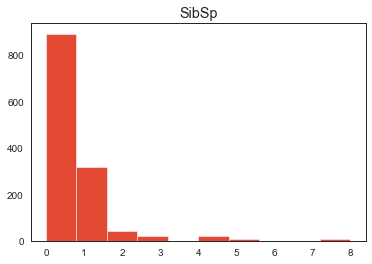

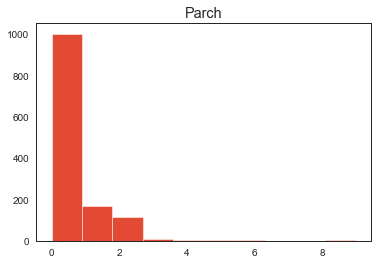

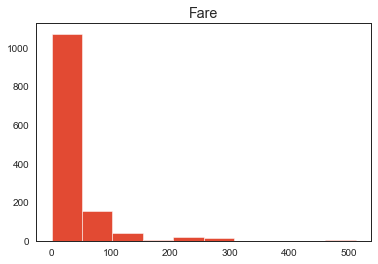

In [10]:
# numeric features distribution
df_full_num = df_full[['Age','SibSp','Parch','Fare']]

for i in df_full_num.columns:
    plt.hist(df_full_num[i])
    plt.title(i)
    plt.show()

Most of numerical features have skewed distributions, except for Age, which is pretty normal.

#### Correlations

<AxesSubplot:>

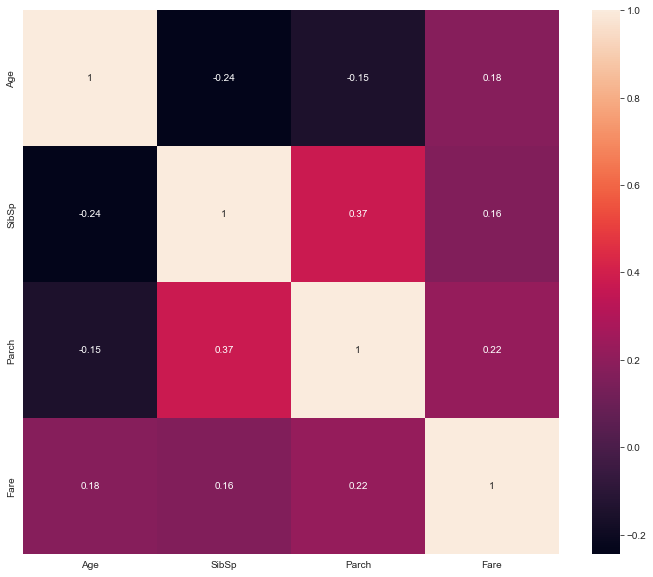

In [11]:
# numerical features
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_full_num.corr(), annot=True, ax=ax)

<AxesSubplot:>

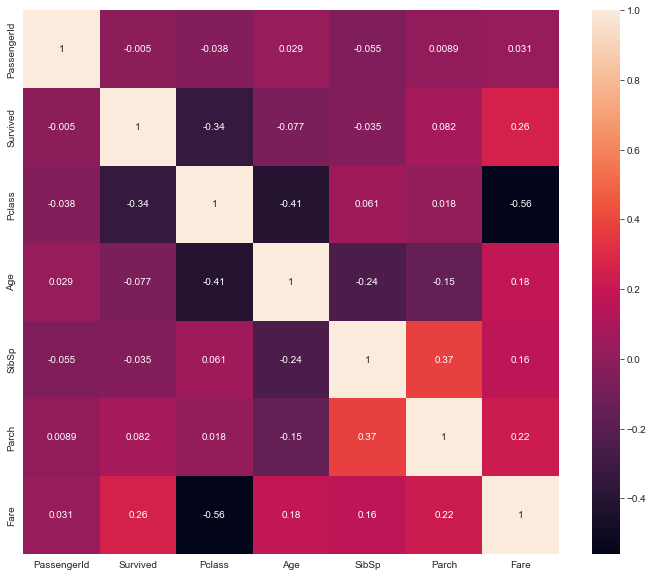

In [12]:
# all features correlation
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(df_full.corr(), annot=True, ax=ax)

Just looking at correlation chart, it's possible to see that Pclass (passenger class) and Fare are strongly correlated with our target feature. This means that the more expensive the fare, more chances to survive. On the same way, more rich people had more chances to survive. 
So far, Titanic movie seems to be very close to reality.

Now, let's have a look to other features, and ther relationships with survival

In [13]:
def plot_survival_rate_by_feature( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

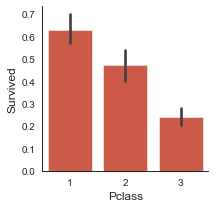

In [14]:
# survival rate by PClass
plot_survival_rate_by_feature(df_full, 'Pclass', 'Survived')

Definitly it's a pattern here: more rich, more probability of surviving

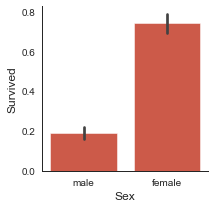

In [15]:
# survival rate by Sex
plot_survival_rate_by_feature(df_full, 'Sex', 'Survived')

Evidently, women had preference when boarding the rescue boats

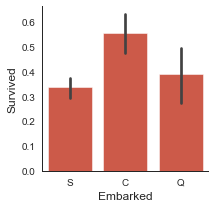

In [16]:
# survival rate by Embarked
plot_survival_rate_by_feature(df_full, 'Embarked', 'Survived')

Apparently, those who embarked through port C were more likely to survive

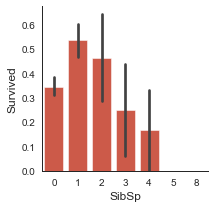

In [17]:
# survival rate by SibSp
plot_survival_rate_by_feature(df_full, 'SibSp', 'Survived')

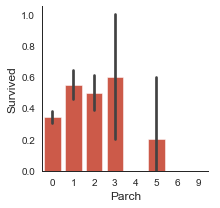

In [18]:
# survival rate by Parch
plot_survival_rate_by_feature(df_full, 'Parch', 'Survived')

For SibSp and Parch there does not seem to be a clear pattern of behavior. Apparently, the condition of having relatives or children could have increased the probability of surviving (because families would have priority), but to confirm this, it would be best to transform these variables to ones that allow us to better identify the existence or not of this correlation.

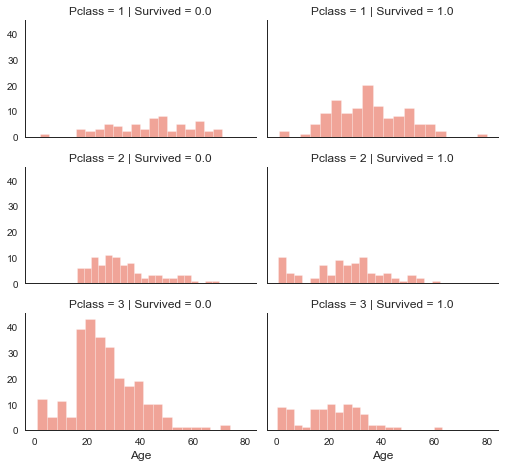

In [19]:
# finally, I'd like to know if class and age had some influence on survival
grid = sns.FacetGrid(df_full, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Evidently, and as we saw previously, class 1 had more survival rate, and something interesting: more young people, specially from classes 1 and 2, had better chances to survive. This could be related with the assumptionf of "children, women and families had priority", so it would be interesting to transform SibSp and Parch features for capturing this behaviour.

#### What do we know so far?

1. Rich people (class 1) who surely paid a high price for a ticket, had a better chance of surviving. So class and fare have to be included on analysis.
2. Women and (apparently) children had mor likely to survive. So sex and age need to be added to analysis.
3. Port also has influence on survival, then, it will be consider on the analysis.
4. Apparently, travelling with relatives also has an influence on survival rate, but features SibSp and Parch will need transformations in order to extract this information.
5. Cabin, Ticket and Name are usless features just the way they are. We'll see if it's possible to transform or create new features based on them, wich lead to useful information.
6. PassengerId, as its name suggest, it's only a indentification number, so it wont't give useful information for modeling. It can be deleted.

## Data wrangling

Ok, now it's time to clean, transform and prepare dataset for modeling!

### Missing values imputation

In [20]:
# check again features with missin values
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Categorical features with missing values: cabin and embarked

Numerical features with missing values: age and fare

(*) There is no need to impute values in survived feature, because this is our target value.

In [21]:
# Numerical features
# I will use median value for Age imputation, and mean for Fare.
df_full['Age'].fillna(df_full['Age'].median(), inplace=True)
df_full['Fare'].fillna(df_full['Fare'].mean(), inplace=True)
df_full.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# Cheking null values again
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [23]:
# for "Embarked" feature I will use mode for imputation
df_full['Embarked'].fillna(df_full['Embarked'].mode()[0], inplace=True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Outliers

Now, I need to check outliers values on continuous features. 

<AxesSubplot:xlabel='Survived', ylabel='Age'>

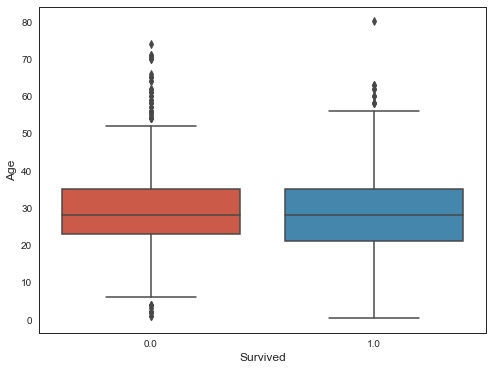

In [24]:
# outliers from age feature
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y= 'Age', data=df_full)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

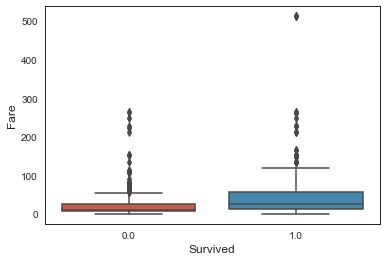

In [25]:
# outliers from fare feature
sns.boxplot(x='Survived', y= 'Fare', data=df_full)

<AxesSubplot:xlabel='Age'>

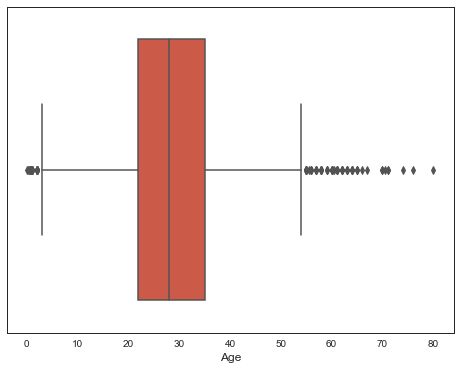

In [26]:
# outliers from age feature
plt.figure(figsize=(8,6))
sns.boxplot(x='Age', data=df_full)

<AxesSubplot:xlabel='Fare'>

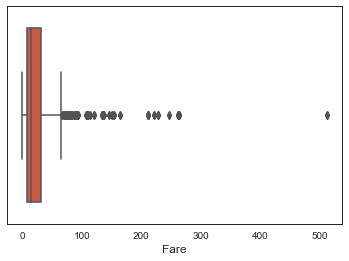

In [27]:
# outliers from fare feature
sns.boxplot(x='Fare', data=df_full)

<AxesSubplot:>

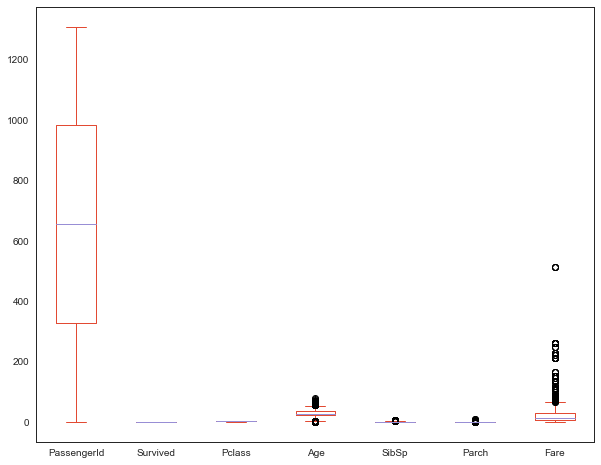

In [28]:
# outliers from all data
df_full.plot(kind='box', figsize= (10,8))

Well...we have some outliers. Normaly, we should attempt to cut out this "strange values" from the dataset, but in this case, I prefer to leave them, because it may be possible to lose some valuable data if they are removed. I am not sure if this is the rigth thing to do, but we can always test if analysis can improve or not with or without this values.

### Feature Engineering

First, I need to deep down into the variables Cabin and Ticket, in order to decide if they need to be removed or transformed.

In [29]:
df_full['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [30]:
len(df_full['Cabin'].unique())

187

In [31]:
# number of unique values
df_full['Cabin'].nunique()

186

It seems that this feature is composed by a letter, followed by numbers. I do not know the meaning of this code, so there are several posibilities: letters could be the type of cabin, floor, location on the ship, if it belongs to a particular class, function and so on, while numbers migth indicate the cabin's id. Let´s remember that there are 295 cabins and 186 are unique. Then, 
there are 109 repeteated values, which probably means that some of the people traveled with others passengers in a same cabin.

Let's see how many people owned a private cabin

In [32]:
df_full_copy = df_full.copy()
df_full_copy['cabin_multiple'] = df_full_copy['Cabin'].apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
df_full_copy['cabin_multiple'].value_counts()

0    1014
1     254
2      26
3      10
4       5
Name: cabin_multiple, dtype: int64

In [33]:
df_full_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0


It looks like a few people had more than one cabin, contrary to the vast majority who seem to have shared cabins. Now let’s see whether the survival rates depend on this.

In [34]:
pd.pivot_table(df_full_copy, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0.0,481.0,58.0,7.0,3.0,NaN
1.0,206.0,122.0,9.0,3.0,2.0


Now, I would like to check if cabin's letter has something to do with survival

In [35]:
# n stands for null
# in this case we will treat null values like it's own category
df_full_copy['cabin_letter'] = df_full_copy['Cabin'].apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(df_full_copy['Cabin'].value_counts())
pd.pivot_table(df_full_copy,index='Survived',columns='cabin_letter', 
                        values = 'Name', aggfunc='count')

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64


cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [36]:
df_full_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,n
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,n
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,n


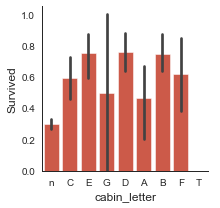

In [37]:
# survival rate by cabin letter
plot_survival_rate_by_feature(df_full_copy, 'cabin_letter', 'Survived')

I can't see a clear pattern, but it seems that cabins E, D and B had better survival rates than the others.

At this point, a decision has to be made...do we keep this feature? remove? transform? My first impulse would be remove this feauture, considering the great quantity of null values, but since it could have some influence on analysis, I believe that maybe it deserves a chance. So, next step is encode this feature for further analysis.

In [38]:
# One hot encoding for cabin feature

cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = df_full['Cabin'].fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin['Cabin'].map(lambda c : c[0])

# dummy encoding ...
cabin = pd.get_dummies(cabin['Cabin'] , prefix = 'Cabin')

cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [39]:
# add this new cabin dummies to dataset
df_full=pd.concat([df_full,cabin],axis=1)
df_full.shape

(1309, 21)

In [40]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,0,0,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,0,0,1,0,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,0,0,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,0,0,0,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,...,S,0,0,0,0,0,0,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,0,0,1,0,0,0,0,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,0,0,0,0,0,0,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,...,S,0,0,0,0,0,0,0,0,1


Ok! Now let's continue with ticket feature

In [41]:
df_full['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [42]:
# number of unique values
df_full['Ticket'].nunique()

929

According to information above, it looks like codes for ticket do not follow a specific pattern. Some of the values have numbers and letters, some others have only numbers, and others contain acronyms mixed with different symbols. It's difficult to guess the meaning of all these values, but something is clear: many of them are repeated. 

¿What should we do then? keep the feature by transforming it? removing it? As I said before, I think there is not a right answer for this. Many experiments with different cleaning process have to be done to find out with certainty what is the best solution. For now, I will remove this feature because personally, I do not see valuable information on it. I will also take advantage to remove the passenger id variable.

In [43]:
# removing PassengerId, Ticket and Cabin features
df_full.drop(columns=['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [44]:
df_full

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,1
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,0,0,1,0,0,0,0,0,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,0,0,0,0,0,0,0,1
1307,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,1


Perfect! Now, let's move on to the next feature: Name

I have to confess that I would have removed this feature if I hadn't research a little more about this problem before. At first glance, a person's name do not tell much, unless that maybe you are working with some NLP problem. So, what is special about name information on this dataset? I could not see at that moment, but reading others tutorials, I understood: names have prefixes, like Mr, Mrs, and so on. Could these prefixes be related with survival? Maybe or maybe not. 

First, let's find out what prefixes we can found

In [45]:
df_full['Title']=df_full['Name'].str.split(', ').str[1].str.split('.').str[0]
df_full['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

I have no idea what are Mlle or Jonkheer titles mean, so in order to simplify this "title" feature, I will copy this code from https://www.kaggle.com/rawanreda/titanic-dataset-full-tutorial

In [46]:
df_full['Title'] =df_full['Title'].replace(['Ms','Mlle'], 'Miss')
df_full['Title'] = df_full['Title'].replace(['Mme','Dona','the Countess','Lady'], 'Mrs')
df_full['Title'] = df_full['Title'].replace(['Rev','Mlle','Jonkheer','Dr','Capt','Don','Col','Major','Sir', 'Master'], 'Mr')

In [47]:
df_full['Title'].unique()

array(['Mr', 'Mrs', 'Miss'], dtype=object)

Perfect! We are ready with this new feature. So now, we can delete Name and transform "title" feature into a numerical categorical variable

In [48]:
df_full.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,0,1,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,1,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,1,Mr
5,0.0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,0,0,0,0,0,0,0,0,1,Mr
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,0,0,0,1,0,0,0,0,Mr
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,0,0,0,0,0,0,0,0,1,Mr
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,0,0,0,0,0,0,0,0,1,Mrs
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,0,0,0,0,0,0,0,0,1,Mrs


In [49]:
# removing name feature
df_full.drop(columns=['Name'], axis=1, inplace=True)
df_full.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,0.0,3,male,22.0,1,0,7.2500,S,0,0,0,0,0,0,0,0,1,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,0,0,1,0,0,0,0,0,0,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,0,0,0,0,0,0,0,0,1,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,0,0,1,0,0,0,0,0,0,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,1,Mr
5,0.0,3,male,28.0,0,0,8.4583,Q,0,0,0,0,0,0,0,0,1,Mr
6,0.0,1,male,54.0,0,0,51.8625,S,0,0,0,0,1,0,0,0,0,Mr
7,0.0,3,male,2.0,3,1,21.0750,S,0,0,0,0,0,0,0,0,1,Mr
8,1.0,3,female,27.0,0,2,11.1333,S,0,0,0,0,0,0,0,0,1,Mrs
9,1.0,2,female,14.0,1,0,30.0708,C,0,0,0,0,0,0,0,0,1,Mrs


In [50]:
# One Hot Encoding for the rest of categorical variables
df_full = pd.get_dummies(df_full, columns=['Sex', 'Embarked', 'Title'])
df_full

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Cabin_T,Cabin_U,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,28.0,0,0,8.0500,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1305,NaN,1,39.0,0,0,108.9000,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1306,NaN,3,38.5,0,0,7.2500,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1307,NaN,3,28.0,0,0,8.0500,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0


Finally, I will introduce others features based on family size. For this, I'll add Sibsp and Parch features and then I'll categorize families into single, small and large, according to the number of members in each family.

In [51]:
# Add Sibsp and Parch: the size of families (including the passenger)
df_full['FamilySize'] = df_full['Parch' ] + df_full['SibSp'] + 1

# introducing other features based on the family size
df_full[ 'Family_Single' ] = df_full[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
df_full[ 'Family_Small' ]  = df_full[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
df_full[ 'Family_Large' ]  = df_full[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

df_full

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,FamilySize,Family_Single,Family_Small,Family_Large
0,0.0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,1,0,1,0,2,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,1,0,...,1,0,0,0,0,1,2,0,1,0
2,1.0,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
4,0.0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,28.0,0,0,8.0500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1305,NaN,1,39.0,0,0,108.9000,0,0,1,0,...,1,0,0,0,0,1,1,1,0,0
1306,NaN,3,38.5,0,0,7.2500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1307,NaN,3,28.0,0,0,8.0500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0


Other tutorials also add age and fare ranges, but I'll skip this step, because I would like to test the current dataframe. Of course, addition of this range categorical features can be tested in other experiment for comparisson.

## Modeling

Woow! This has been a long way. Now, I'll be able to test differents models for this dataframe and predict survival for passengers. So...let's do it!

### Train-test split

In [52]:
# split into train and test dataset
train = df_full[0:891]
test = df_full[891:]

In [53]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,FamilySize,Family_Single,Family_Small,Family_Large
0,0.0,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,1,0,1,0,2,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,0,1,0,...,1,0,0,0,0,1,2,0,1,0
2,1.0,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,1,2,0,1,0
4,0.0,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
887,1.0,1,19.0,0,0,30.0000,0,1,0,0,...,0,0,1,1,0,0,1,1,0,0
888,0.0,3,28.0,1,2,23.4500,0,0,0,0,...,0,0,1,1,0,0,4,0,1,0
889,1.0,1,26.0,0,0,30.0000,0,0,1,0,...,1,0,0,0,1,0,1,1,0,0


In [54]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,FamilySize,Family_Single,Family_Small,Family_Large
891,NaN,3,34.5,0,0,7.8292,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
892,NaN,3,47.0,1,0,7.0000,0,0,0,0,...,0,0,1,0,0,1,2,0,1,0
893,NaN,2,62.0,0,0,9.6875,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
894,NaN,3,27.0,0,0,8.6625,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
895,NaN,3,22.0,1,1,12.2875,0,0,0,0,...,0,0,1,0,0,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,28.0,0,0,8.0500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1305,NaN,1,39.0,0,0,108.9000,0,0,1,0,...,1,0,0,0,0,1,1,1,0,0
1306,NaN,3,38.5,0,0,7.2500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1307,NaN,3,28.0,0,0,8.0500,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0


In [55]:
# split into X_train, y_train, X_test, y_test
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1)
y_test = test["Survived"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((891, 26), (891,), (418, 26), (418,))

### Scale

In [56]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,FamilySize,Family_Single,Family_Small,Family_Large
0,3,22.0,1,0,7.2500,0,0,0,0,0,...,0,0,1,0,1,0,2,0,1,0
1,1,38.0,1,0,71.2833,0,0,1,0,0,...,1,0,0,0,0,1,2,0,1,0
2,3,26.0,0,0,7.9250,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,0,0,1,0,0,1,2,0,1,0
4,3,35.0,0,0,8.0500,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
887,1,19.0,0,0,30.0000,0,1,0,0,0,...,0,0,1,1,0,0,1,1,0,0
888,3,28.0,1,2,23.4500,0,0,0,0,0,...,0,0,1,1,0,0,4,0,1,0
889,1,26.0,0,0,30.0000,0,0,1,0,0,...,1,0,0,0,1,0,1,1,0,0


In [57]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,FamilySize,Family_Single,Family_Small,Family_Large
891,3,34.5,0,0,7.8292,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
892,3,47.0,1,0,7.0000,0,0,0,0,0,...,0,0,1,0,0,1,2,0,1,0
893,2,62.0,0,0,9.6875,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
894,3,27.0,0,0,8.6625,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
895,3,22.0,1,1,12.2875,0,0,0,0,0,...,0,0,1,0,0,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,28.0,0,0,8.0500,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1305,1,39.0,0,0,108.9000,0,0,1,0,0,...,1,0,0,0,0,1,1,1,0,0
1306,3,38.5,0,0,7.2500,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
1307,3,28.0,0,0,8.0500,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0


### Feature importance

In [58]:
# helpers function
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def plot_variable_importance(X , y):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

0.9831649831649831


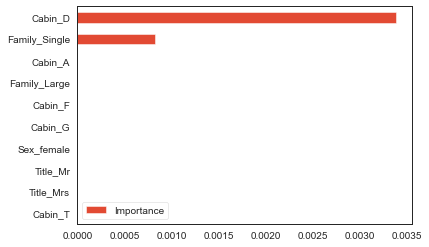

In [59]:
plot_variable_importance(X_train, y_train)

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
X_train

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [-1.56610693,  0.66386103,  0.43279337, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ]])

In [62]:
X_test

array([[ 0.82737724,  0.39488658, -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       [ 0.82737724,  1.35550962,  0.43279337, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [-0.36936484,  2.50825727, -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       ...,
       [ 0.82737724,  0.70228595, -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       [ 0.82737724, -0.1046374 , -0.4745452 , ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ]])

### Model

In [63]:
# logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_lg = round(model.score(X_train, y_train) * 100, 2)
acc_lg

81.71

In [64]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_nb = round(model.score(X_train, y_train) * 100, 2)
acc_nb

69.36

In [65]:
# svc 
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_svc = round(model.score(X_train, y_train) * 100, 2)
acc_svc

83.95

In [66]:
# linear svc
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_lsvc = round(model.score(X_train, y_train) * 100, 2)
acc_lsvc

82.04

In [67]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_rf = round(model.score(X_train, y_train) * 100, 2)
acc_rf

98.32

In [68]:
# KNN
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_knn = round(model.score(X_train, y_train) * 100, 2)
acc_knn

83.84

In [69]:
# Desicion tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_dt = round(model.score(X_train, y_train) * 100, 2)
acc_dt

98.32

In [70]:
# SDG
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_sdg = round(model.score(X_train, y_train) * 100, 2)
acc_sdg

75.53

In [71]:
# Perceptron
model = Perceptron()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_per = round(model.score(X_train, y_train) * 100, 2)
acc_per 

75.98

## Results

In [72]:
results = pd.DataFrame({
    'Model': ['logistic_regression', 'naive_bayes', 'svc', 
              'linear_svc', 'random_forest', 'knn', 
              'decision_tree', 'perceptron', 
              'SDG'],
    'Score': [acc_lg, acc_nb, acc_svc, 
              acc_lsvc, acc_rf, acc_knn, 
              acc_dt, acc_per, acc_sdg]})
results.sort_values(by='Score', ascending=False)

,Model,Score
4,random_forest,98.32
6,decision_tree,98.32
2,svc,83.95
5,knn,83.84
3,linear_svc,82.04
0,logistic_regression,81.71
7,perceptron,75.98
8,SDG,75.53
1,naive_bayes,69.36


## Conclusions

As we can see in results table, random forest and decision tree had the same and the highest accuracy score (around 98%). This is great! but, further deep analysis is needed, because this result could be due to overfit. It would be good add others features (those I jumped for instance) and try all over again scaling only continuous features (and not scaling anything at all). It would be possible try another scaling (like minmax), remove some features like Sibs and Parch, and not add any of the features added in this notebook.
Then, a grid search params is needed, in order to maximize accuracy, and chose the final model.

Personal conclusions:
Well, it has been really funny! I learnt a lot with this dataset, although I have the feeling that there is much lot of work to do yet. 